## Importing Libraries 

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [40]:
data = pd.read_csv('IMDb movies.csv', low_memory=False)

In [41]:
data.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [42]:
data.describe()

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
count,85855.000000,85855.000000,8.585500e+04,13305.000000,78258.000000,74058.000000
mean,100.351418,5.898656,9.493490e+03,55.896881,46.040826,27.479989
std,22.553848,1.234987,5.357436e+04,17.784874,178.511411,58.339158
min,41.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000
25%,88.000000,5.200000,2.050000e+02,43.000000,4.000000,3.000000
50%,96.000000,6.100000,4.840000e+02,57.000000,9.000000,8.000000
75%,108.000000,6.800000,1.766500e+03,69.000000,27.000000,23.000000
max,808.000000,9.900000,2.278845e+06,100.000000,10472.000000,999.000000


In [43]:
data.isna().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

In [44]:
genre_guest_df = data.sort_values('genre', # sort by column
                                 ascending=False, # enable descending order
                                 kind='heapsort', #sorting algorithm
                                 na_position='last')

In [38]:
#genre_guest_df.head()

In [50]:
data.dropna(inplace=True)

In [52]:
country = data.groupby('country').agg({'budget':'sum','worlwide_gross_income':'sum', 'usa_gross_income':'sum' })
country.head(10)

,budget,worlwide_gross_income,usa_gross_income
country,,,
"Afghanistan, Ireland, Japan, Iran, Netherlands",$ 46000,$ 3910519,$ 1270904
"Algeria, France, Morocco, Belgium",EUR 14500000,$ 22963701,$ 320700
"Algeria, Italy",$ 800000,$ 964028,$ 879794
Argentina,$ 1500000,$ 12413888,$ 1222889
"Argentina, Chile",ARS 2000000,$ 165891,$ 7358
"Argentina, Denmark, France, Mexico, USA, Germany, Brazil, Netherlands",ARS 3000000,$ 1253774,$ 60231
"Argentina, Germany, Qatar, Dominican Republic",DOP 25185569,$ 4224,$ 3815
"Argentina, Italy, Netherlands, Spain",$ 1400000,$ 1261792,$ 304124
"Argentina, Spain",$ 800000$ 2000000,$ 618264$ 42629597,$ 200433$ 6391436


In [230]:
most_voted_movie = data.groupby('title').agg({'votes':'sum'}).reset_index()
most_voted_movie= most_voted_movie.sort_values('votes', ascending=False)
top_10 = most_voted_movie.head(10)
top_10

,title,votes
3489,Le ali della libertà,2278845
2316,Il cavaliere oscuro,2241615
2672,Inception,2002816
1634,Fight Club,1807440
4569,Pulp Fiction,1780147
1686,Forrest Gump,1755490
3823,Matrix,1632315
2276,Il Signore degli Anelli - La compagnia dell'An...,1619920
2275,Il Signore degli Anelli - Il ritorno del re,1604280
2494,Il padrino,1572674


<AxesSubplot:xlabel='title', ylabel='votes'>

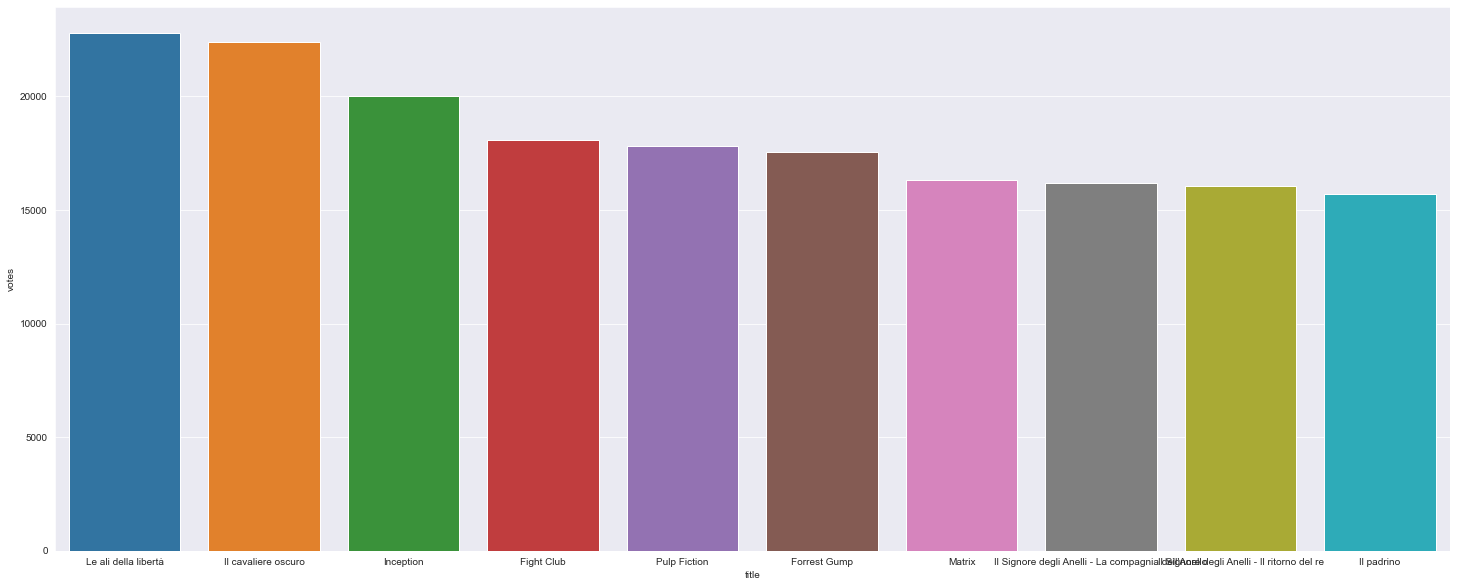

In [233]:
sns.set_style('darkgrid')
plt.figure(figsize=(25, 10))
sns.barplot(x='title', y=top_10['votes']/100, data=top_10 )

In [209]:
usa_gross_income_per_movie = data.groupby('title').agg({'usa_gross_income':'sum'}).reset_index()
usa_gross_income_per_movie.sort_values('usa_gross_income', ascending=False)

,title,usa_gross_income
1878,Gnomeo & Giulietta,$ 99967670
4059,Nashville,$ 9984123
1437,Dudley Do-Right,$ 9974410
773,Brazil,$ 9929135
4755,Ritorno al bosco dei 100 acri,$ 99215042
...,...,...
6536,Zohan - Tutte le donne vengono al pettine,$ 100018837
4338,Passengers,$ 100014699
1344,Die Hard - Duri a morire,$ 100012499
4934,Se ti mordo... sei mio,$ 10000000


In [207]:
budget_per_movie = data.groupby('title').agg({'budget':'sum'}).reset_index()
budget_per_movie.sort_values('budget', ascending=False)

,title,budget
5343,Suriyothai,THB 400000000
4243,Ong Bak 2 - La nascita del dragone,THB 300000000
5769,The Protector - La legge del Muay Thai,THB 200000000
5573,The Eye,SGD 4500000$ 12000000
597,Be with Me,SGD 200000
...,...,...
5389,Tape,$ 100000
5384,Tangerine,$ 100000
2320,Il cerchio,$ 10000
1638,Film Geek,$ 10000


In [212]:
worlwide_gross_income_per_movie = data.groupby('title').agg({'worlwide_gross_income':'sum'})
worlwide_gross_income_per_movie.sort_values('worlwide_gross_income', ascending=False)
worlwide_gross_income_per_movie.head()

,worlwide_gross_income
title,
(500) giorni insieme,$ 60722734
(S)ex list,$ 30426096
-2 Livello del terrore,$ 7766240
...E alla fine arriva Polly,$ 178311729
...E tu vivrai nel terrore! L'aldilà,$ 123843


In [91]:
langa = pd.DataFrame(lang.language.str.split(',').tolist(), index=lang.votes).stack()
langa= langa.reset_index([0, 'votes'])
langa.columns = ['votes', 'language']
langa.head()

,votes,language
0,4431,Aboriginal
1,4431,English
2,6530,Aboriginal
3,6530,Japanese
4,6530,Hokkien


In [217]:
budget_per_country = pd.DataFrame(countrys['country'].str.split(',').tolist(), index=countrys.worlwide_gross_income).stack()
budget_per_country= budget_per_country.reset_index([0, 'worlwide_gross_income'])
budget_per_country.columns = ['worlwide_gross_income', 'country' ]
budget_per_country.groupby('country')['worlwide_gross_income'].transform('sum')#.agg({'worlwide_gross_income':'sum'}
budget_per_country

,worlwide_gross_income,country
0,$ 458564$ 8936663,Thailand
1,$ 27165581,Thailand
2,$ 27165581,USA
3,$ 27165581,Hong Kong
4,$ 27165581,France
...,...,...
3460,$ 2708087,France
3461,$ 2708087,Italy
3462,$ 799953,Iran
3463,$ 799953,Italy


In [138]:
popular_movie = data.groupby('title').agg({'votes':'sum'}).reset_index()
popular_movie.max()

title    È tutta fortuna
votes            2278845
dtype: object

In [186]:
most_used_language = pd.DataFrame(data['language'].str.split(',').tolist(), index=data.imdb_title_id).stack()
most_used_language= most_used_language.reset_index([0, 'imdb_title_id'])
most_used_language.columns = ['imdb_title_id', 'language']
most_used_language 

,imdb_title_id,language
0,tt0017136,German
1,tt0021749,English
2,tt0027977,English
3,tt0029453,French
4,tt0029453,Arabic
...,...,...
11001,tt9208444,English
11002,tt9214832,English
11003,tt9354944,English
11004,tt9426210,Japanese


In [189]:
top_language = pd.DataFrame(most_used_language['language'].value_counts()).reset_index()
top_language.columns = ['language', 'no_of_movies_per_language']

top_10_languages = top_language.head(10)

<AxesSubplot:xlabel='language', ylabel='no_of_movies_per_language'>

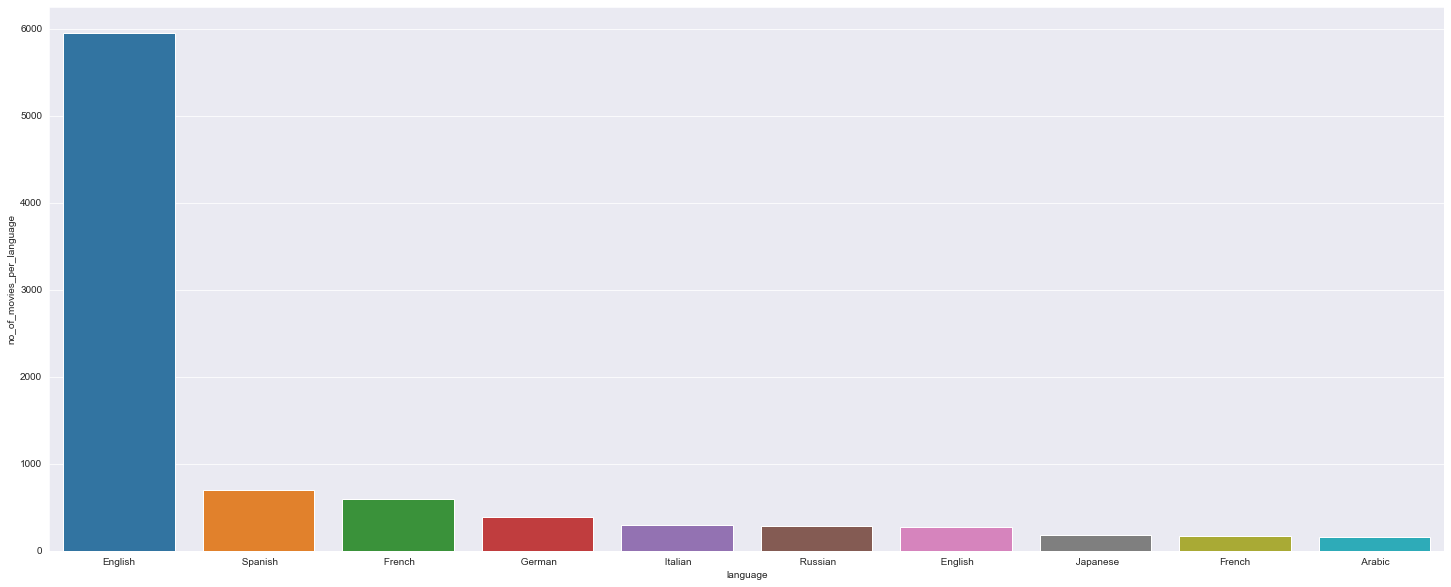

In [190]:
sns.set_style('darkgrid')
plt.figure(figsize=(25, 10))
sns.barplot(x='language', y= 'no_of_movies_per_language', data=top_50_languages )

In [106]:
genres = pd.DataFrame(data['genre'].str.split(',').tolist(), index=data.imdb_title_id).stack()
genres= genres.reset_index([0, 'imdb_title_id'])
genres.columns = ['imdb_title_id', 'genre']
genres.head()

,imdb_title_id,genre
0,tt0017136,Drama
1,tt0017136,Sci-Fi
2,tt0021749,Comedy
3,tt0021749,Drama
4,tt0021749,Romance


In [130]:
top_genre = pd.DataFrame(genres['genre'].value_counts()).reset_index()
top_genre.columns = ['genre', 'no_of_movies']


<AxesSubplot:xlabel='genre', ylabel='no_of_movies'>

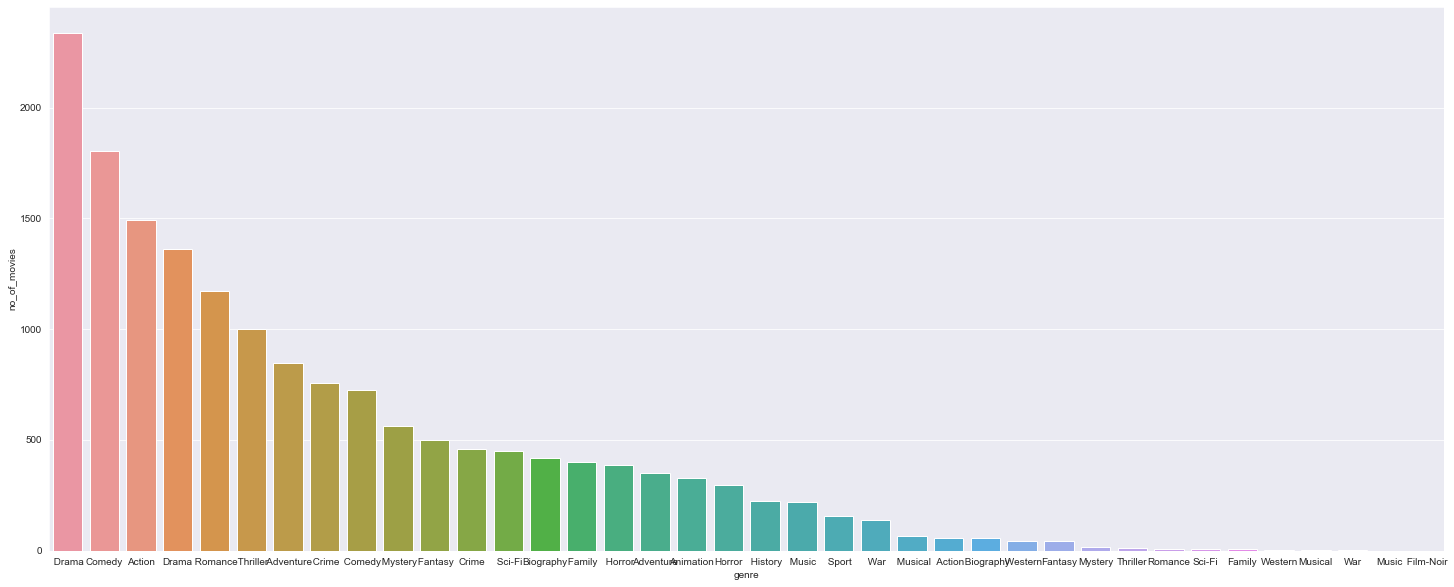

In [129]:
sns.set_style('darkgrid')
plt.figure(figsize=(25, 10))
sns.barplot(x='genre', y= 'no_of_movies', data=top_genre )